In [1]:
!pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import *
mpl.rcParams['figure.dpi'] = 300

In [3]:
data = get_data('insurance')

In [4]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


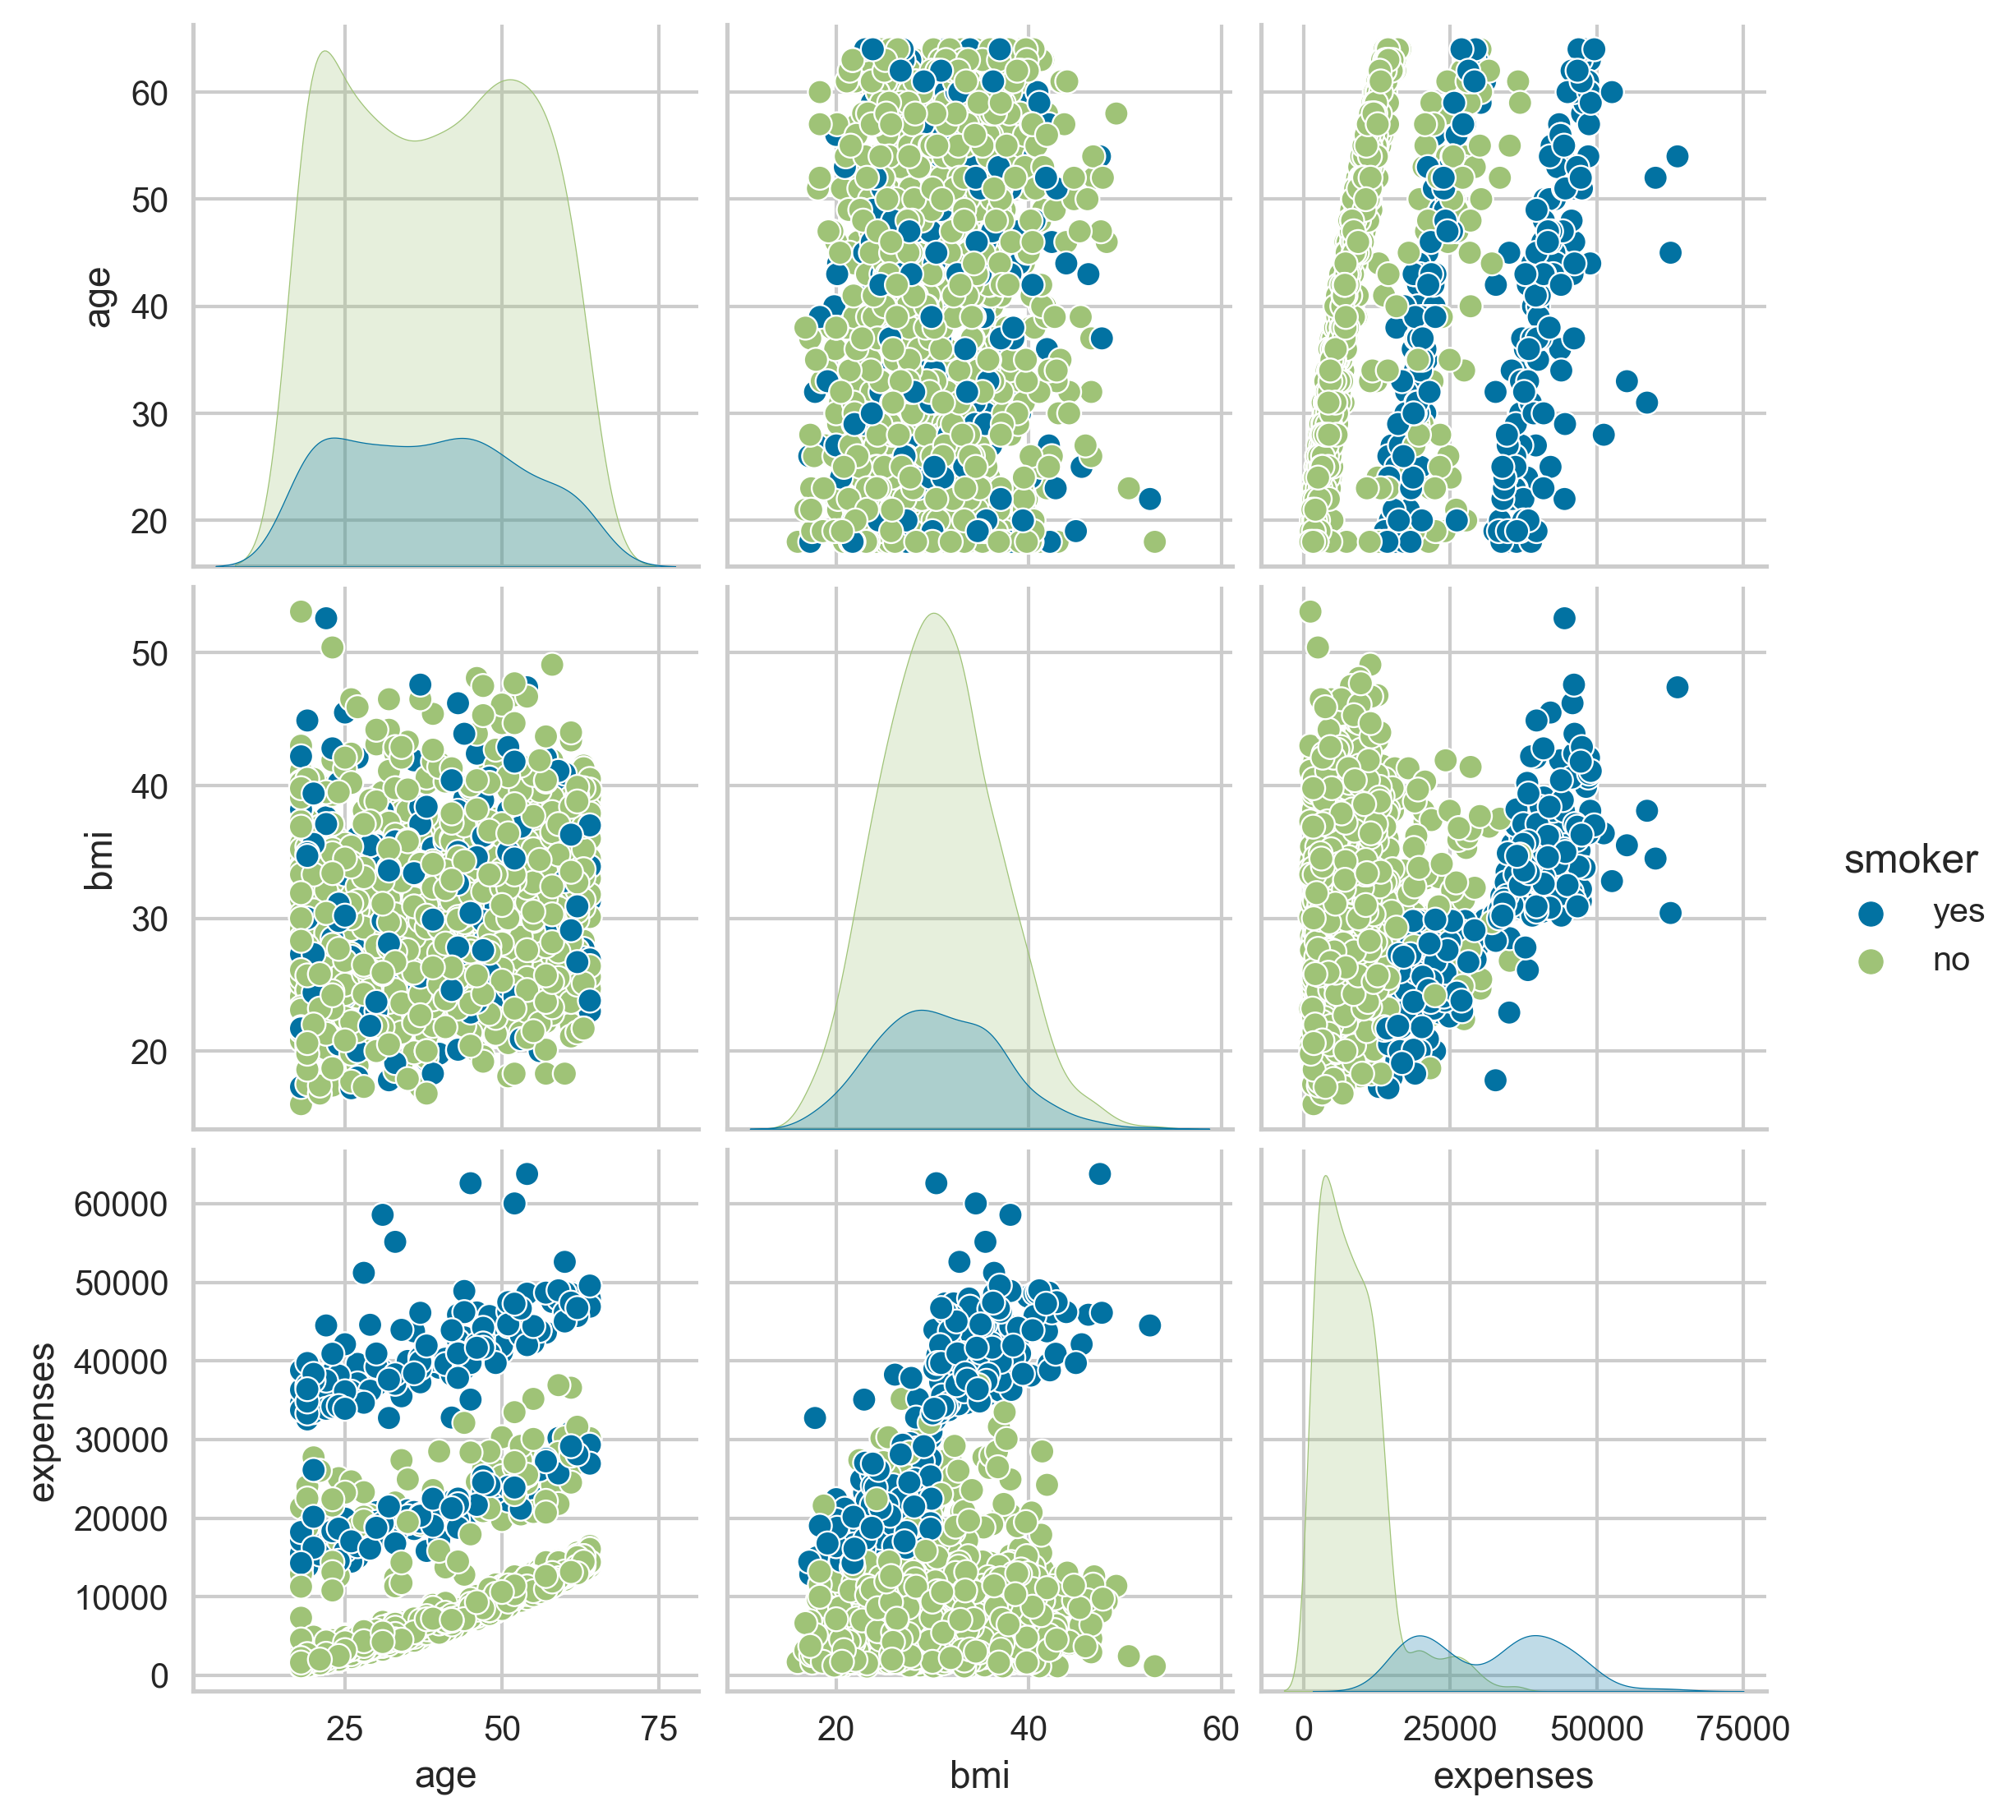

In [10]:
numeric = ['age', 'bmi', 'expenses', 'smoker']

sns.pairplot(data[numeric], hue='smoker')
plt.show()

In [11]:
numeric = ['age', 'bmi', 'children', 'expenses']
categorical = ['smoker', 'sex', 'region']

In [12]:
reg = setup(
    data = data,
    target= 'expenses',
    train_size = 0.8,
    session_id = 9085,
    normalize = True
)

,Description,Value
0,Session id,9085
1,Target,expenses
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [14]:
#Experiment no.2
from pycaret.regression import *
reg2 = setup(data, target = 'expenses', session_id = 6820,
           normalize = True,
           polynomial_features = True,

           bin_numeric_features= ['age', 'bmi'])

In [15]:
best = compare_models(sort='RMSE')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:51:23
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)


In [16]:
model = create_model('gbr', fold= 10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:52:55
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2575.5674,21841381.5545,4673.4764,0.8745,0.4770,0.2870
1,2678.8590,28023444.6480,5293.7175,0.7944,0.3979,0.2764
2,1874.7240,10911836.1373,3303.3068,0.9338,0.3545,0.2545
3,2101.5232,13563276.3807,3682.8354,0.8100,0.3694,0.2858
4,2268.8037,14770175.6063,3843.1986,0.9061,0.4375,0.3464
5,2497.6144,24134233.3625,4912.6605,0.8114,0.4219,0.2451
6,2840.8861,31664309.3654,5627.1049,0.8675,0.3903,0.2564
7,2665.5757,20229164.0838,4497.6843,0.8210,0.4336,0.3603
8,2783.2873,24842714.9778,4984.2467,0.8554,0.4812,0.3184


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:

params = {
    'learning_rate': [0.01, 0.02, 0.05],
    'max_depth': [1,2,3,4,5,6,7,8],
    'subsample': [0.4, 0.5, 0.6, 0.7, 0.8],
    'n_estimators': [100,200.300,400,500,600]
}

In [18]:

tuned_model = tune_model(
    model,
    optimize='RMSE',
    fold=10,
    custom_grid=params,
    n_iter= 30
)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [19]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2645.4808,22236528.0964,4715.5623,0.8348,0.4327,0.2829


,age,sex,bmi,children,smoker,region,expenses,prediction_label
1125,63,female,25.100000,0,no,northwest,14254.610352,15839.345377
410,19,male,17.500000,0,no,northwest,1621.339966,2176.640700
585,33,female,28.299999,1,no,southeast,4779.600098,5606.110730
619,55,female,37.099998,0,no,southwest,10713.639648,13430.262805
101,30,male,25.500000,0,no,northeast,3645.090088,4274.043369
...,...,...,...,...,...,...,...,...
1188,43,female,25.299999,1,yes,northeast,21771.339844,24066.953667
668,62,male,32.000000,0,yes,northeast,45710.210938,44937.380161
465,30,female,28.400000,1,yes,southeast,19521.970703,19508.902593
126,19,female,28.299999,0,yes,southwest,17081.080078,18854.270077


In [20]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
final_model = finalize_model(model)
save_model(final_model, 'Premimum-Prediction_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\acer\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWr...
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
                 ('normalize', TransformerWrapper(tran